In [143]:
cleaned_train_data = pd.read_csv('cleaned_train_data.csv')
cleaned_test_data = pd.read_csv('cleaned_test_data.csv')

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



# Separate features and target variable
X_train = cleaned_train_data.drop(columns=['Listing.Price.ClosePrice', 'Listing.ListingId'], errors='ignore')
y_train = cleaned_train_data['Listing.Price.ClosePrice']

X_valid = cleaned_test_data

# Initialize Random Forest with reasonable defaults
rf_model = RandomForestRegressor(
    n_estimators=200,     # Number of trees
    max_depth=20,         # Limit tree depth for better generalization
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=5,   # Minimum samples required in a leaf node
    bootstrap=True,       # Use bootstrap samples
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_valid.drop(columns=["Listing.ListingId"]))




In [146]:
len(X_valid['Listing.ListingId'])

22039

In [147]:
len(y_pred)

22039

In [148]:
predictions_df = pd.DataFrame({
    'Listing.ListingId': X_valid['Listing.ListingId'],  # Replace with the actual column for IDs
    'Listing.Price.ClosePrice': y_pred
})

# Save the predictions to a CSV file
predictions_df.to_csv('predicted_prices.csv', index=False)

print("Predicted prices have been saved to 'predicted_prices.csv'.")

Predicted prices have been saved to 'predicted_prices.csv'.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

data_subset = cleaned_train_data

# Separate features and target variable
X = data_subset.drop(columns=['Listing.Price.ClosePrice', 'Listing.ListingId'], errors='ignore')
y = data_subset['Listing.Price.ClosePrice']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest with reasonable defaults
rf_model = RandomForestRegressor(
    n_estimators=100,     # Number of trees
    max_depth=15,         # Limit tree depth for better generalization
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=5,   # Minimum samples required in a leaf node
    bootstrap=True,       # Use bootstrap samples
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
variance_y = np.var(y_valid)
accuracy = 1 - (mse / variance_y)

# Print results
print(f"Random Forest - Validation MSE: {mse:,.2f}")
print(f"Random Forest - Validation MAE: {mae:,.2f}")
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest - Validation MSE: 42,174,267,900.65
Random Forest - Validation MAE: 92,439.57
Random Forest Accuracy: 69.45%


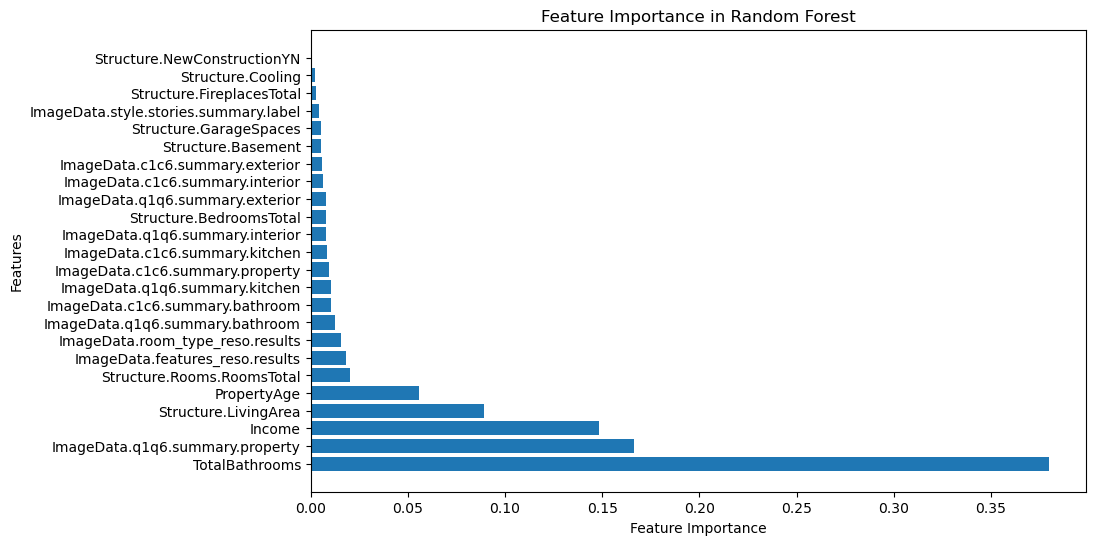

In [149]:
# Analyze feature importance
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()